In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [314]:
covid = pd.read_csv('covid-data.csv')

In [315]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [316]:
X = covid.iloc[:,:-1]
y = covid.iloc[:,-1]

## To find missing values in the dataset

In [317]:
covid.isnull().sum()

iso_code                               0
continent                           5191
location                               0
date                                   0
total_cases                         5015
new_cases                           5018
new_cases_smoothed                  6033
total_deaths                       15555
new_deaths                         15400
new_deaths_smoothed                 6033
total_cases_per_million             5584
new_cases_per_million               5587
new_cases_smoothed_per_million      6597
total_deaths_per_million           16111
new_deaths_per_million             15956
new_deaths_smoothed_per_million     6597
reproduction_rate                  22109
gdp_per_capita                     12194
cardiovasc_death_rate              12310
diabetes_prevalence                 9468
handwashing_facilities             62253
hospital_beds_per_thousand         21387
life_expectancy                     5780
human_development_index            12216
dtype: int64

In [318]:
covid.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
reproduction_rate                  float64
gdp_per_capita                     float64
cardiovasc_death_rate              float64
diabetes_prevalence                float64
handwashing_facilities             float64
hospital_beds_per_thousand         float64
life_expectancy                    float64
human_devel

In [319]:
covid.drop(['iso_code', 'new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million', 'continent'], inplace=True, axis=1)
covid.head()

,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,24-02-2020,1.0,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,Afghanistan,25-02-2020,1.0,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,Afghanistan,26-02-2020,1.0,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,Afghanistan,27-02-2020,1.0,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,Afghanistan,28-02-2020,1.0,NaN,NaN,NaN,0.025,NaN,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


## Handle missing values in numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases'>

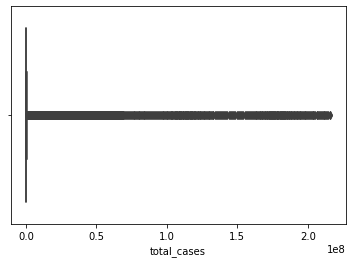

In [320]:
sns.boxplot('total_cases', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases_smoothed'>

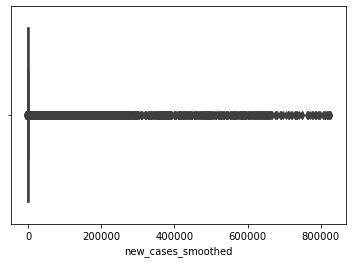

In [321]:
sns.boxplot('new_cases_smoothed', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_deaths'>

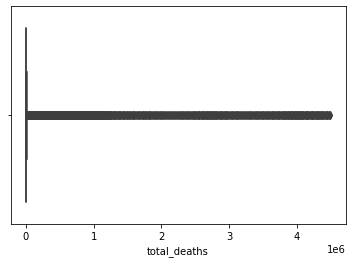

In [322]:
sns.boxplot('total_deaths', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_deaths_smoothed'>

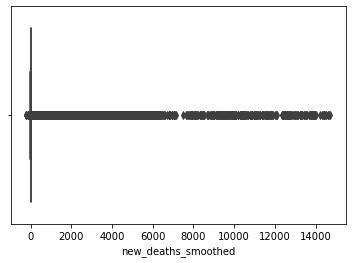

In [323]:
sns.boxplot('new_deaths_smoothed', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases_per_million'>

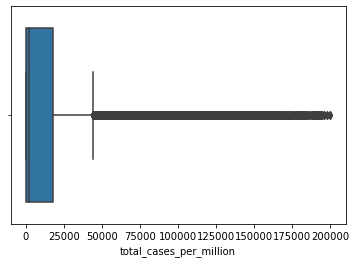

In [324]:
sns.boxplot('total_cases_per_million', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases_smoothed_per_million'>

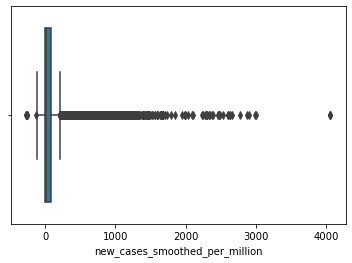

In [325]:
sns.boxplot('new_cases_smoothed_per_million', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reproduction_rate'>

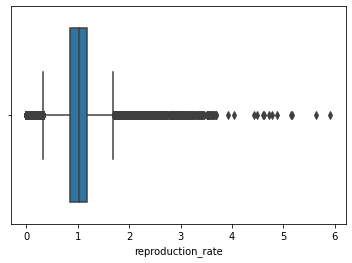

In [326]:
sns.boxplot('reproduction_rate', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita'>

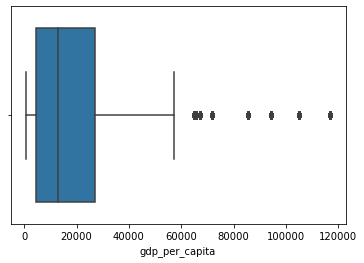

In [327]:
sns.boxplot('gdp_per_capita', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardiovasc_death_rate'>

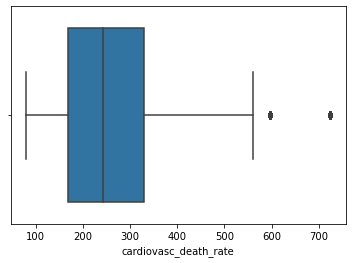

In [328]:
sns.boxplot('cardiovasc_death_rate', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes_prevalence'>

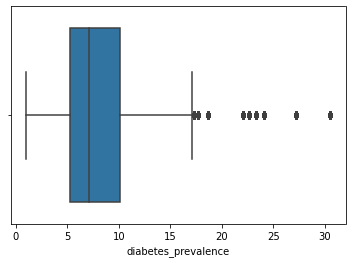

In [329]:
sns.boxplot('diabetes_prevalence', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='handwashing_facilities'>

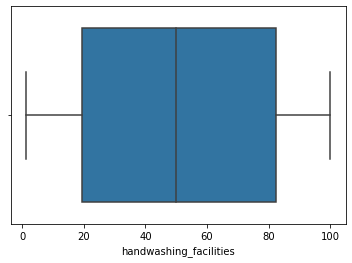

In [330]:
sns.boxplot('handwashing_facilities', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_beds_per_thousand'>

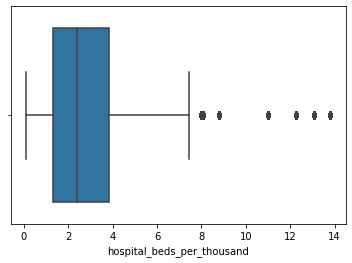

In [331]:
sns.boxplot('hospital_beds_per_thousand', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expectancy'>

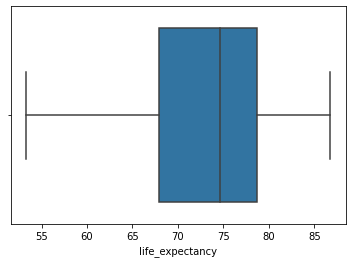

In [332]:
sns.boxplot('life_expectancy', data=covid)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='human_development_index'>

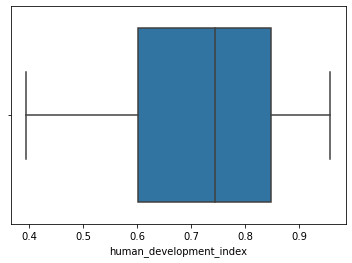

In [333]:
sns.boxplot('human_development_index', data=covid)

In [334]:
extreme_total_cases = covid.total_cases.mean() + 3*covid.total_cases.std()
extreme_new_cases_smoothed = covid.new_cases_smoothed.mean() + 3*covid.new_cases_smoothed.std()
extreme_new_deaths_smoothed = covid.new_deaths_smoothed.mean() + 3*covid.new_deaths_smoothed.std()
extreme_total_cases_per_million = covid.total_cases_per_million.mean() + 3*covid.total_cases_per_million.std()
extreme_new_cases_smoothed_per_million = covid.new_cases_smoothed_per_million.mean() + 3*covid.new_cases_smoothed_per_million.std()
extreme_handwashing_facilities = covid.handwashing_facilities.mean() + 3*covid.handwashing_facilities.std()
extreme_reproduction_rate = covid.reproduction_rate.mean() + 3*covid.reproduction_rate.std()
extreme_gdp_per_capita = covid.gdp_per_capita.mean() + 3*covid.gdp_per_capita.std()
extreme_cardiovasc_death_rate = covid.cardiovasc_death_rate.mean() + 3*covid.cardiovasc_death_rate.std()
extreme_diabetes_prevalence = covid.diabetes_prevalence.mean() + 3*covid.diabetes_prevalence.std()
extreme_hospital_beds_per_thousand = covid.hospital_beds_per_thousand.mean() + 3*covid.hospital_beds_per_thousand.std()
extreme_life_expectancy = covid.life_expectancy.mean() + 3*covid.life_expectancy.std()
extreme_human_development_index = covid.human_development_index.mean() + 3*covid.human_development_index.std()

In [335]:
def impute_nan(covid, variable, median, extreme):
    #to fill NaN values with extreme values
    covid[variable+'_end_distribution'] = covid[variable].fillna(extreme)
    #filling Na with median values
    covid[variable].fillna(median, inplace = True)

In [336]:
impute_nan(covid, 'total_cases', covid.total_cases.median(), extreme_total_cases)
impute_nan(covid, 'new_cases_smoothed', covid.new_cases_smoothed.median(), extreme_new_cases_smoothed)
impute_nan(covid, 'new_deaths_smoothed', covid.new_deaths_smoothed.median(), extreme_new_deaths_smoothed)
impute_nan(covid, 'total_cases_per_million', covid.total_cases_per_million.median(), extreme_total_cases_per_million)
impute_nan(covid, 'new_cases_smoothed_per_million', covid.new_cases_smoothed_per_million.median(), extreme_new_cases_smoothed_per_million)
impute_nan(covid, 'handwashing_facilities', covid.handwashing_facilities.median(), extreme_handwashing_facilities)
impute_nan(covid, 'reproduction_rate', covid.reproduction_rate.median(), extreme_reproduction_rate)
impute_nan(covid, 'gdp_per_capita', covid.gdp_per_capita.median(), extreme_gdp_per_capita)
impute_nan(covid, 'cardiovasc_death_rate', covid.cardiovasc_death_rate.median(), extreme_cardiovasc_death_rate)
impute_nan(covid, 'diabetes_prevalence', covid.diabetes_prevalence.median(), extreme_diabetes_prevalence)
impute_nan(covid, 'hospital_beds_per_thousand', covid.hospital_beds_per_thousand.median(), extreme_hospital_beds_per_thousand)
impute_nan(covid, 'hospital_beds_per_thousand', covid.hospital_beds_per_thousand.median(), extreme_hospital_beds_per_thousand)
impute_nan(covid, 'human_development_index', covid.human_development_index.median(), extreme_human_development_index)
covid.drop(['total_cases', 'new_cases_smoothed', 'total_deaths', 'total_deaths_per_million', 'new_deaths_smoothed_per_million', 'total_cases_per_million', 'new_cases_smoothed_per_million', 'handwashing_facilities', 'reproduction_rate', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'], inplace=True, axis=1)

covid.isnull().sum()

location                                           0
date                                               0
new_deaths_smoothed                                0
total_cases_end_distribution                       0
new_cases_smoothed_end_distribution                0
new_deaths_smoothed_end_distribution               0
total_cases_per_million_end_distribution           0
new_cases_smoothed_per_million_end_distribution    0
handwashing_facilities_end_distribution            0
reproduction_rate_end_distribution                 0
gdp_per_capita_end_distribution                    0
cardiovasc_death_rate_end_distribution             0
diabetes_prevalence_end_distribution               0
hospital_beds_per_thousand_end_distribution        0
human_development_index_end_distribution           0
dtype: int64

## Handle Categorical Variables

In [337]:
covid.head()

,location,date,new_deaths_smoothed,total_cases_end_distribution,new_cases_smoothed_end_distribution,new_deaths_smoothed_end_distribution,total_cases_per_million_end_distribution,new_cases_smoothed_per_million_end_distribution,handwashing_facilities_end_distribution,reproduction_rate_end_distribution,gdp_per_capita_end_distribution,cardiovasc_death_rate_end_distribution,diabetes_prevalence_end_distribution,hospital_beds_per_thousand_end_distribution,human_development_index_end_distribution
0,Afghanistan,24-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
1,Afghanistan,25-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
2,Afghanistan,26-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
3,Afghanistan,27-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
4,Afghanistan,28-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511


In [338]:
#to convert the above feature into a dictionary, with the category as the key and the frequency count as the value
location_map = covid['location'].value_counts().to_dict()
location_map

{'Argentina': 606,
 'Mexico': 606,
 'Peru': 606,
 'Thailand': 603,
 'Taiwan': 591,
 'South Korea': 586,
 'China': 585,
 'Japan': 585,
 'United States': 585,
 'World': 585,
 'North America': 585,
 'Asia': 585,
 'Vietnam': 584,
 'Hong Kong': 584,
 'Europe': 584,
 'Singapore': 584,
 'European Union': 584,
 'France': 583,
 'Germany': 583,
 'Malaysia': 583,
 'Oceania': 582,
 'Nepal': 582,
 'Australia': 581,
 'Canada': 581,
 'Sri Lanka': 580,
 'Cambodia': 580,
 'United Arab Emirates': 578,
 'Finland': 578,
 'India': 577,
 'Fiji': 577,
 'Philippines': 577,
 'United Kingdom': 576,
 'Russia': 576,
 'Italy': 576,
 'Spain': 575,
 'Sweden': 575,
 'Slovenia': 574,
 'Denmark': 574,
 'Estonia': 573,
 'Belgium': 572,
 'Malta': 570,
 'South Africa': 569,
 'International': 569,
 'Morocco': 569,
 'Africa': 563,
 'Egypt': 562,
 'Guatemala': 559,
 'Greece': 557,
 'Iran': 557,
 'Portugal': 557,
 'Israel': 556,
 'Lebanon': 555,
 'Luxembourg': 554,
 'South America': 554,
 'Latvia': 554,
 'Chile': 553,
 'Czech

In [339]:
#to map the frequency value onto the category in the features
covid['location'] = covid['location'].map(location_map)

In [340]:
covid.head()

,location,date,new_deaths_smoothed,total_cases_end_distribution,new_cases_smoothed_end_distribution,new_deaths_smoothed_end_distribution,total_cases_per_million_end_distribution,new_cases_smoothed_per_million_end_distribution,handwashing_facilities_end_distribution,reproduction_rate_end_distribution,gdp_per_capita_end_distribution,cardiovasc_death_rate_end_distribution,diabetes_prevalence_end_distribution,hospital_beds_per_thousand_end_distribution,human_development_index_end_distribution
0,552,24-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
1,552,25-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
2,552,26-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
3,552,27-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511
4,552,28-02-2020,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511


## Handle Temporal Variables

In [341]:
data = pd.DataFrame(covid['date'])
data['date'] = pd.to_datetime(covid['date'])
data.columns = ['date']
data.head()

,date
0,2020-02-24
1,2020-02-25
2,2020-02-26
3,2020-02-27
4,2020-02-28


In [342]:
#to retrieve the day, month, weekday, date infomation separately
#name of days
data['date'].dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
112655    2021
112656    2021
112657    2021
112658    2021
112659    2021
Name: date, Length: 112660, dtype: int64

In [343]:
data['date'].dt.month

0         2
1         2
2         2
3         2
4         2
         ..
112655    8
112656    8
112657    8
112658    8
112659    8
Name: date, Length: 112660, dtype: int64

In [344]:
data['date'].dt.day

0         24
1         25
2         26
3         27
4         28
          ..
112655    24
112656    25
112657    26
112658    27
112659    28
Name: date, Length: 112660, dtype: int64

In [345]:
#to add columns to an existing dataset
covid['day'] = data['date'].dt.year
covid['month'] = data['date'].dt.month
covid['year'] = data['date'].dt.year
covid.drop(['date'], inplace=True, axis=1)
covid.head()

,location,new_deaths_smoothed,total_cases_end_distribution,new_cases_smoothed_end_distribution,new_deaths_smoothed_end_distribution,total_cases_per_million_end_distribution,new_cases_smoothed_per_million_end_distribution,handwashing_facilities_end_distribution,reproduction_rate_end_distribution,gdp_per_capita_end_distribution,cardiovasc_death_rate_end_distribution,diabetes_prevalence_end_distribution,hospital_beds_per_thousand_end_distribution,human_development_index_end_distribution,day,month,year
0,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511,2020,2,2020
1,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511,2020,2,2020
2,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511,2020,2,2020
3,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511,2020,2,2020
4,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,0.511,2020,2,2020


In [346]:
covid = covid[['location', 'new_deaths_smoothed', 'total_cases_end_distribution', 'new_cases_smoothed_end_distribution', 'new_deaths_smoothed_end_distribution', 'total_cases_per_million_end_distribution', 'new_cases_smoothed_per_million_end_distribution', 'handwashing_facilities_end_distribution', 'reproduction_rate_end_distribution', 'gdp_per_capita_end_distribution', 'cardiovasc_death_rate_end_distribution', 'diabetes_prevalence_end_distribution', 'hospital_beds_per_thousand_end_distribution', 'day', 'month', 'year', 'human_development_index_end_distribution']]
covid.isnull().sum()

location                                           0
new_deaths_smoothed                                0
total_cases_end_distribution                       0
new_cases_smoothed_end_distribution                0
new_deaths_smoothed_end_distribution               0
total_cases_per_million_end_distribution           0
new_cases_smoothed_per_million_end_distribution    0
handwashing_facilities_end_distribution            0
reproduction_rate_end_distribution                 0
gdp_per_capita_end_distribution                    0
cardiovasc_death_rate_end_distribution             0
diabetes_prevalence_end_distribution               0
hospital_beds_per_thousand_end_distribution        0
day                                                0
month                                              0
year                                               0
human_development_index_end_distribution           0
dtype: int64

In [347]:
covid.head()

,location,new_deaths_smoothed,total_cases_end_distribution,new_cases_smoothed_end_distribution,new_deaths_smoothed_end_distribution,total_cases_per_million_end_distribution,new_cases_smoothed_per_million_end_distribution,handwashing_facilities_end_distribution,reproduction_rate_end_distribution,gdp_per_capita_end_distribution,cardiovasc_death_rate_end_distribution,diabetes_prevalence_end_distribution,hospital_beds_per_thousand_end_distribution,day,month,year,human_development_index_end_distribution
0,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020,0.511
1,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020,0.511
2,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020,0.511
3,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020,0.511
4,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020,0.511


## Train-Test Split

In [348]:
#to drop the dependent feature, i.e., the survived column
covid.drop('human_development_index_end_distribution', axis=1).head()

,location,new_deaths_smoothed,total_cases_end_distribution,new_cases_smoothed_end_distribution,new_deaths_smoothed_end_distribution,total_cases_per_million_end_distribution,new_cases_smoothed_per_million_end_distribution,handwashing_facilities_end_distribution,reproduction_rate_end_distribution,gdp_per_capita_end_distribution,cardiovasc_death_rate_end_distribution,diabetes_prevalence_end_distribution,hospital_beds_per_thousand_end_distribution,day,month,year
0,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020
1,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020
2,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020
3,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020
4,552,1.571,1.0,121849.750866,2363.352827,0.025,559.29491,37.746,2.061473,1803.987,597.029,9.59,0.5,2020,2,2020


In [349]:
#to display only the survived column
covid['human_development_index_end_distribution'].head()

0    0.511
1    0.511
2    0.511
3    0.511
4    0.511
Name: human_development_index_end_distribution, dtype: float64

In [350]:
#to create the train test split. Test size as 0.3 means 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covid.drop('human_development_index_end_distribution', axis=1), covid['human_development_index_end_distribution'], test_size=0.30, random_state=101)

## Robust Scaler because of Outliers

In [351]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(X_train, y_train)
robust

RobustScaler()

## Training and Predicting

In [352]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [353]:
#prediction of test values
y_prediction =  LR.predict(X_test)
y_prediction

array([0.60369251, 0.54964072, 0.65472688, ..., 0.8811406 , 0.53246716,
       0.61404532])

In [354]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is: ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is:  0.8134317607591398
mean_sqrd_error is:  0.007468147373556062
root_mean_squared error of is:  0.08641844348028992


Since the R2 score is greater than 0.8, the model can be used for multiple linear regression.